In [1]:
# This file is to look at a few things - the degree of variance in avg review scores, some text analytics like word clouds,

import pandas as pd

# Func to import data from TSVs

def process_file(file_path):
    """Process an individual TSV file."""
    
    chunk_size = 50000  
    processed_data = []
    
    for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size, error_bad_lines=False):
        # Calculating review_length
        chunk['review_length'] = chunk['review_body'].str.len()
        
        processed_data.append(chunk)
    
    # Combine chunks
    final_df = pd.concat(processed_data, axis=0, ignore_index=True)
    
    # Memory usage information
    # initial_memory = sum(c.memory_usage(deep=True).sum() for c in processed_data)
    # final_memory = final_df.memory_usage(deep=True).sum()
    # print(f"File: {file_path}")
    # print(f"Memory Usage Before: {initial_memory / (1024 ** 2):.2f} MB")
    # print(f"Memory Usage After: {final_memory / (1024 ** 2):.2f} MB")
    # print("------")
    
    return final_df

# List for all DFs
all_dataframes = []

# List file paths and process
file_paths = [(r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Outdoors_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Furniture_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Automotive_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Major_Appliances_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Office_Products_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Tools_v1_00.tsv"), (r"D:\NYCDSA REVIEWS PROJECT\AMZN_Reviews\amazon_reviews_us_Camera_v1_00.tsv"), ]  # Add paths as needed
for path in file_paths:
    df = process_file(path)
    all_dataframes.append(df)

# Combine all DFs
combined_df = pd.concat(all_dataframes, axis=0, ignore_index=True)


C:\Users\willf\AppData\Local\Temp\ipykernel_7316\210093658.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  for chunk in pd.read_csv(file_path, sep='\t', chunksize=chunk_size, error_bad_lines=False):
b'Skipping line 3121: expected 15 fields, saw 22\nSkipping line 23098: expected 15 fields, saw 22\nSkipping line 44261: expected 15 fields, saw 22\nSkipping line 46415: expected 15 fields, saw 22\nSkipping line 49691: expected 15 fields, saw 22\n'
b'Skipping line 53219: expected 15 fields, saw 22\nSkipping line 76042: expected 15 fields, saw 22\nSkipping line 94032: expected 15 fields, saw 22\n'
b'Skipping line 114699: expected 15 fields, saw 22\nSkipping line 125796: expected 15 fields, saw 22\n'
b'Skipping line 157739: expected 15 fields, saw 22\nSkipping line 175898: expected 15 fields, saw 22\nSkipping line 177167: expected 15 fields, saw 22\nSkipping line 192248: expected 15 fields, saw 

In [2]:
# OPTIMIZING DF SIZE

import numpy as np

combined_df = combined_df[combined_df['star_rating'].apply(lambda x: str(x).isnumeric())]

# optimization function
def optimize_df(df):
    # Check if 'review_length' column exists
    if 'review_length' not in df.columns:
        raise ValueError("The 'review_length' column is missing from the dataframe.")

    # Drop NaNs
    df.dropna(subset=['review_length', 'star_rating'], inplace=True)

    # Convert length to int
    df['review_length'] = df['review_length'].astype(int)
    
    # Drop marketplace
    df.drop(columns=['marketplace'], inplace=True)
    
    # Convert to appropriate types
    df['customer_id'] = df['customer_id'].astype('int32')
    df['product_parent'] = df['product_parent'].astype('int32')
    df['product_category'] = df['product_category'].astype('category')
    df['star_rating'] = df['star_rating'].astype('float16')
    df['helpful_votes'] = df['helpful_votes'].astype('float16')
    df['total_votes'] = df['total_votes'].astype('float16')
    df['vine'] = (df['vine'] == 'Y').astype(bool)
    df['verified_purchase'] = (df['verified_purchase'] == 'Y').astype(bool)
    df['review_date'] = pd.to_datetime(df['review_date'])

    return df

# Optimize the dataframe
optimized_df = optimize_df(combined_df.copy())

optimized_df.head()


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
0,18446823,R35T75OLUGHL5C,B000NV6H94,110804376,Stearns Youth Boating Vest (50-90 lbs.),Outdoors,4.0,0.0,0.0,False,True,Four Stars,GOOD VALUE,2015-08-31,10
1,13724367,R2BV735O46BN33,B000IN0W3Y,624096774,Primal Wear Men's Pink Floyd Dark Side of The ...,Outdoors,5.0,0.0,0.0,False,True,Five Stars,Excellent quality.,2015-08-31,18
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,278970944,Osprey Hydraulics Reservoir,Outdoors,4.0,0.0,0.0,False,True,Only Flaw Is The Cap,3rd season using it. I only fill with water an...,2015-08-31,1684
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,312877650,CamelBak eddy .75L Water Bottle,Outdoors,3.0,1.0,1.0,False,True,Poor design leads to frequent mildew.,poor construction as mildew keeps forming in t...,2015-08-31,152
4,30907790,R39PEQBT5ISEF4,B00EZA3VW0,305567912,Children Black Red Striped Plastic Housing Ska...,Outdoors,1.0,0.0,0.0,False,True,"Very bad quality, clips was broken when it arr...","Very bad quality, clips was broken when it arr...",2015-08-31,178


In [3]:
optimized_df['prod_id_len'] = optimized_df['product_id'].apply(len)
print(optimized_df['prod_id_len'].unique())

[10]


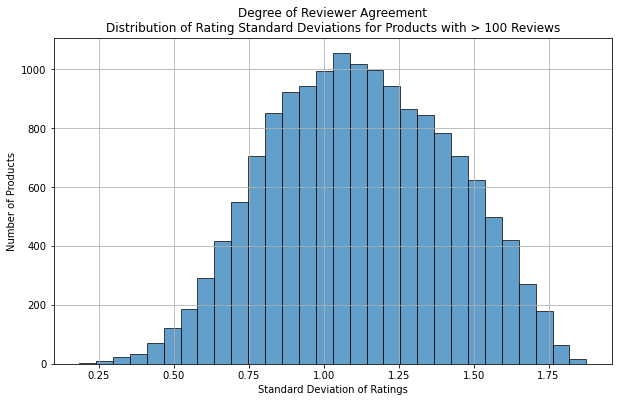

     product_id  ratings_stdev  ratings_count
130  0439893577       0.979531            176
148  0528959948       1.015019            230
457  0739007432       0.807538            130
886  098949232X       0.348490            185
893  0989528391       0.349272            172


In [5]:
# Calc distribution of reviewer agreement, standard deviation of ratings per product
import matplotlib.pyplot as plt

# Group by product and calc ratings stdev
grouped_data = optimized_df.groupby('product_id')['star_rating'].agg(['std', 'count']).reset_index()
grouped_data.rename(columns={'std': 'ratings_stdev', 'count': 'ratings_count'}, inplace=True)

# New DF
df_prod = grouped_data

# Filter ou products with fewer than 101 reviews
df_prod_100 = df_prod[df_prod['ratings_count'] > 100]

# Plot a histogram 
plt.figure(figsize=(10, 6))
plt.hist(df_prod_100['ratings_stdev'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title("Degree of Reviewer Agreement\nDistribution of Rating Standard Deviations for Products with > 100 Reviews")
plt.xlabel('Standard Deviation of Ratings')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

print(df_prod_100.head())


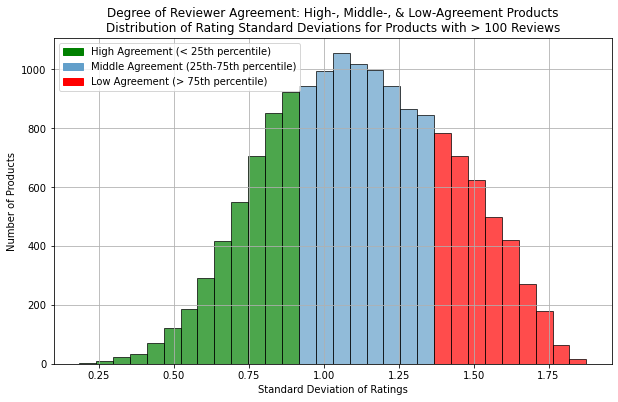

In [8]:
# Define and plot high-agreement and low-agreement products as part of ratings stdev distribution
from matplotlib.patches import Patch

# Define thresholds
low_agreement_threshold = df_prod_100['ratings_stdev'].quantile(0.75)
high_agreement_threshold = df_prod_100['ratings_stdev'].quantile(0.25)

# Plot
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(df_prod_100['ratings_stdev'].dropna(), bins=30, edgecolor='k', alpha=0.7)

middle_color = (98/255, 159/255, 202/255)

# Color the bars based on the standard deviation range
for bin_left, bin_right, patch in zip(bins, bins[1:], patches):
    bin_value = (bin_left + bin_right) / 2  
    if bin_value <= high_agreement_threshold:
        patch.set_facecolor('green')
    elif bin_value > low_agreement_threshold:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor(middle_color)

# Create legend as patch
legend_patches = [
    Patch(color='green', label='High Agreement (< 25th percentile)'),
    Patch(color=middle_color, label='Middle Agreement (25th-75th percentile)'),
    Patch(color='red', label='Low Agreement (> 75th percentile)')
]

# Labels
plt.title("Degree of Reviewer Agreement: High-, Middle-, & Low-Agreement Products\nDistribution of Rating Standard Deviations for Products with > 100 Reviews")
plt.xlabel('Standard Deviation of Ratings')
plt.ylabel('Number of Products')
plt.legend(handles=legend_patches)
plt.grid(True)
plt.show()


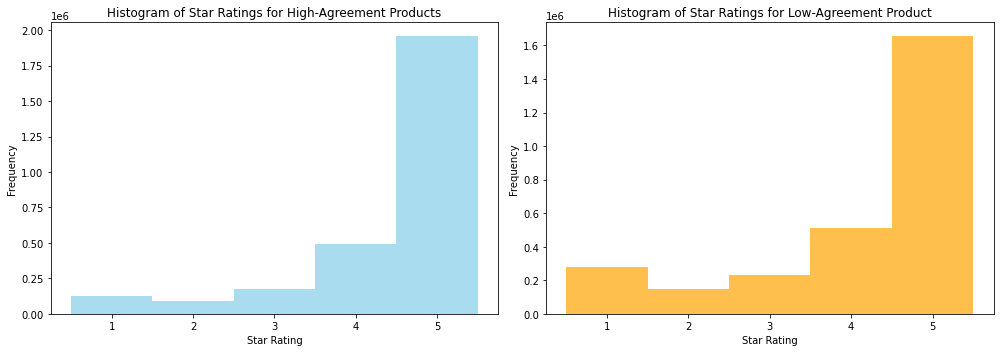

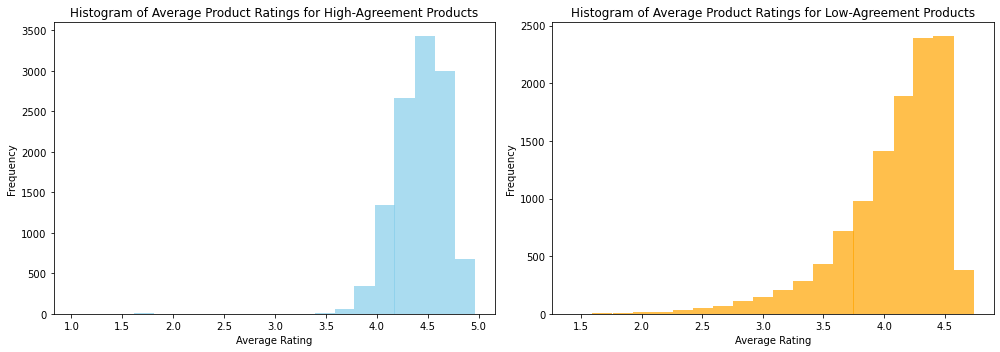

In [10]:
# Plot histograms of high- and low-agreement products - hist of ratings distribution and hist of avg product ratings

# Merge optimized_df with df_prod_100 to get individual ratings 
merged_df = pd.merge(optimized_df, df_prod_100[['product_id', 'ratings_stdev']], on='product_id')

# Filter merged DF for high and low stdev products
high_stdev_ratings = merged_df[merged_df['ratings_stdev'] >= high_agreement_threshold]
low_stdev_ratings = merged_df[merged_df['ratings_stdev'] <= low_agreement_threshold]

# Calc avg ratings for high vs low stdev products
high_stdev_individual_ratings = high_stdev_ratings['star_rating']
low_stdev_individual_ratings = low_stdev_ratings['star_rating']
high_stdev_avg_ratings = high_stdev_ratings.groupby('product_id')['star_rating'].mean()
low_stdev_avg_ratings = low_stdev_ratings.groupby('product_id')['star_rating'].mean()

# Plot
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))

axs1[0].hist(low_stdev_individual_ratings, bins=5, color='skyblue', alpha=0.7, range=(0.5, 5.5))
axs1[0].set_title('Histogram of Star Ratings for High-Agreement Products')
axs1[0].set_xlabel('Star Rating')
axs1[0].set_ylabel('Frequency')

axs1[1].hist(high_stdev_individual_ratings, bins=5, color='orange', alpha=0.7, range=(0.5, 5.5))
axs1[1].set_title('Histogram of Star Ratings for Low-Agreement Product')
axs1[1].set_xlabel('Star Rating')
axs1[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(1, 2, figsize=(14, 5))

axs2[0].hist(low_stdev_avg_ratings, bins=20, color='skyblue', alpha=0.7)
axs2[0].set_title('Histogram of Average Product Ratings for High-Agreement Products')
axs2[0].set_xlabel('Average Rating')
axs2[0].set_ylabel('Frequency')

axs2[1].hist(high_stdev_avg_ratings, bins=20, color='orange', alpha=0.7)
axs2[1].set_title('Histogram of Average Product Ratings for Low-Agreement Products')
axs2[1].set_xlabel('Average Rating')
axs2[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
